In [1]:
!pip install bmipy
import time
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import bmi_cfe
import os  # Import os for file handling
import warnings
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import json
import bmi_cfe
import json
import os
import numpy as np
import bmi_cfe
import shutil
import numpy as np

In [2]:
import pandas as pd
import numpy as np
import os

# Define the paths to the CSV files
observed_csv_file_path = 'observed_11480390.csv'
forcing_csv_file_path = '1148039_forcing.csv'
pet_csv_file_path = '11480390_hourly_nldas.csv'

# Create the perturbation folder if it doesn't exist
output_folder = 'perturbation'
os.makedirs(output_folder, exist_ok=True)

# Read the PET CSV file into a DataFrame
pet = pd.read_csv(pet_csv_file_path)

# Read the observed streamflow CSV file into a DataFrame
observed_streamflow = pd.read_csv(observed_csv_file_path)

# Convert the 'date' column to a pandas datetime object
observed_streamflow['date'] = pd.to_datetime(observed_streamflow['date'])

# Filter the observed data for the specific date range
start_date = '2012-01-01'
end_date = '2012-12-30'
observed_mask = (observed_streamflow['date'] >= start_date) & (observed_streamflow['date'] <= end_date)
filtered_observed_streamflow = observed_streamflow[observed_mask]

# Convert discharge from cubic feet per second (cfs) to cubic meters per second (cms)
filtered_observed_streamflow['discharge_cms'] = filtered_observed_streamflow['observation'] * 0.0283168
filtered_observed_streamflow['discharge_cms'].fillna(method='ffill', inplace=True)

# Read the forcing data CSV file into a DataFrame
df_forcing = pd.read_csv(forcing_csv_file_path)

# Ensure the 'time' column is in datetime format
df_forcing['time'] = pd.to_datetime(df_forcing['time'], format='%m/%d/%Y %H:%M')

# Filter the forcing data for the specific date range
forcing_mask = (df_forcing['time'] >= start_date) & (df_forcing['time'] <= end_date)
filtered_forcing = df_forcing[forcing_mask]
filtered_columns = filtered_forcing[['APCP_surface', 'time']]

# Filter PET data like observation and forcing
# Convert the 'date' column to a pandas datetime object
pet['date'] = pd.to_datetime(pet['date'])

# Filter the PET data for the specific date range
pet_mask = (pet['date'] >= start_date) & (pet['date'] <= end_date)
filtered_pet = pet[pet_mask]

# Extract only the 'date' and 'potential_evaporation' columns
filtered_pet = filtered_pet[['date', 'potential_evaporation']]
filtered_pet = filtered_pet[['potential_evaporation']]

p_data = pd.concat([filtered_columns, filtered_pet], axis=1)
p_data.set_index('time', inplace=True)

# Example error value
err = 0.15  # Replace with the actual error value

# Extract the data
apcp_surface = p_data['APCP_surface'].values
pet = p_data['potential_evaporation'].values

# Number of time steps (nda) and samples (nSample)
nda = len(apcp_surface)
nSample = 25  # Replace with the actual number of samples

# Create arrays to hold the perturbed values
pr_apcp = np.zeros((nda, nSample))
pr_pet = np.zeros((nda, nSample))

# Perturb the APCP_surface values using a lognormal distribution
for t in range(nda):
    pr_apcp[t, :] = np.random.lognormal(mean=np.log(apcp_surface[t] + 1e-10), sigma=err, size=nSample)  # Adding a small value to avoid log(0)

# Perturb the potential_evaporation (PET) values using a normal distribution
for t in range(nda):
    pr_pet[t, :] = pet[t] + np.random.randn(nSample) * pet[t] * err

# Save each sample to a separate CSV file in the perturbation folder
for i in range(nSample):
    sample_data = pd.DataFrame({
        'time': p_data.index,
        'APCP_surface': pr_apcp[:, i],
        'potential_evaporation': pr_pet[:, i]
    })
    sample_data.to_csv(os.path.join(output_folder, f'sample_{i + 1}.csv'), index=False)


/tmp/ipykernel_384/863777473.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  pet = pd.read_csv(pet_csv_file_path)
/tmp/ipykernel_384/863777473.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_observed_streamflow['discharge_cms'] = filtered_observed_streamflow['observation'] * 0.0283168
/tmp/ipykernel_384/863777473.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

/tmp/ipykernel_384/428349675.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_observed_streamflow['discharge_cms'] = filtered_observed_streamflow['observation'] * 0.0283168
/tmp/ipykernel_384/428349675.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_observed_st

Running simulation for: perturbation/sample_15.csv
Running simulation for: perturbation/sample_9.csv
Running simulation for: perturbation/sample_19.csv
Running simulation for: perturbation/sample_22.csv
Running simulation for: perturbation/sample_7.csv
Running simulation for: perturbation/sample_5.csv
Running simulation for: perturbation/sample_2.csv
Running simulation for: perturbation/sample_20.csv
Running simulation for: perturbation/sample_16.csv
Running simulation for: perturbation/sample_6.csv
Running simulation for: perturbation/sample_11.csv
Running simulation for: perturbation/sample_23.csv
Running simulation for: perturbation/sample_21.csv
Running simulation for: perturbation/sample_12.csv
Running simulation for: perturbation/sample_4.csv
Running simulation for: perturbation/sample_10.csv
Running simulation for: perturbation/sample_25.csv
Running simulation for: perturbation/sample_13.csv
Running simulation for: perturbation/sample_14.csv
Running simulation for: perturbation/

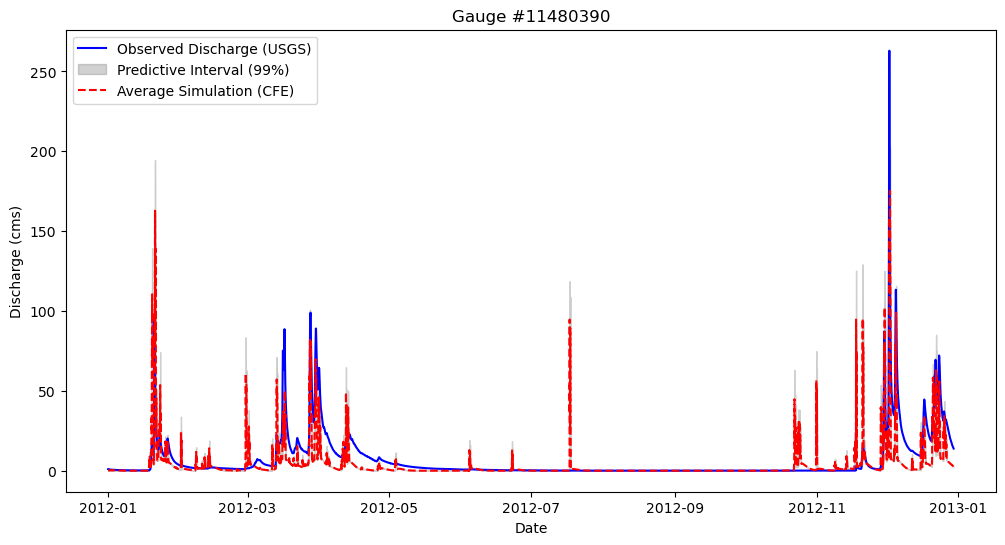

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bmi_cfe
import glob
import os

# Ensure the directory for simulation results exists
os.makedirs('simulation_results', exist_ok=True)

# List all CSV files
csv_files = glob.glob('perturbation/sample_*.csv')

# Filter the observed data for the specific date range
start_date = '2012-01-01'
end_date = '2012-12-30'
observed_mask = (observed_streamflow['date'] >= start_date) & (observed_streamflow['date'] <= end_date)
filtered_observed_streamflow = observed_streamflow[observed_mask]

# Convert discharge from cubic feet per second (cfs) to cubic meters per second (cms)
filtered_observed_streamflow['discharge_cms'] = filtered_observed_streamflow['observation'] * 0.0283168
filtered_observed_streamflow['discharge_cms'].fillna(method='ffill', inplace=True)

# Save the filtered and converted observed data to a new CSV file
filtered_observed_output_file_path = 'filtered_observed_converted.csv'
filtered_observed_streamflow.to_csv(filtered_observed_output_file_path, index=False)
discharge_usgs = filtered_observed_streamflow['discharge_cms']
time_index_observed = pd.to_datetime(filtered_observed_streamflow['date'])
df2 = discharge_usgs.values.flatten()

# Initialize an empty DataFrame to store all simulation results
all_simulations_df = pd.DataFrame()

# Loop through each CSV file
for csv_file in csv_files:
    print(f"Running simulation for: {csv_file}")  # Print the name of the simulation file
    data = pd.read_csv(csv_file)

    # Filter the necessary columns
    filtered_forcing = data[['time', 'APCP_surface']]
    filtered_pet = data['potential_evaporation']

    # Initialize the CFE instance
    cfe_instance = bmi_cfe.BMI_CFE('./best_config_Perturb.json')
    cfe_instance.initialize()

    # Get output variable names
    outputs = cfe_instance.get_output_var_names()
    output_lists = {output: [] for output in outputs}

    # Run the model for each precipitation value in the filtered forcing data
    for precip, pet in zip(filtered_forcing['APCP_surface'], filtered_pet):
        cfe_instance.set_value('atmosphere_water__time_integral_of_precipitation_mass_flux', precip)
        cfe_instance.set_value('water_potential_evaporation_flux', pet / 1000 / 3600)

        cfe_instance.update()

        for output in outputs:
            output_lists[output].append(cfe_instance.get_value(output))

    # Finalize the model
    cfe_instance.finalize(print_mass_balance=False)

    # Convert the output lists to a DataFrame
    output_df = pd.DataFrame(output_lists)
    output_df['time'] = filtered_forcing['time']
    output_df['csv_file'] = os.path.basename(csv_file)
    
    # Append the output DataFrame to the consolidated DataFrame
    all_simulations_df = pd.concat([all_simulations_df, output_df], ignore_index=True)

# Save the consolidated DataFrame to a CSV file
all_simulations_df.to_csv('simulation_results/all_simulations.csv', index=False)

# Adjust the runoff volume flux by dividing by 3600 for plotting
all_simulations_df['land_surface_water__runoff_volume_flux'] = all_simulations_df['land_surface_water__runoff_volume_flux'] / 3600

# Calculate the average of all simulations for each time step
average_simulation = all_simulations_df.groupby('time')['land_surface_water__runoff_volume_flux'].mean()

# Calculate the min and max for the shaded area
simulation_grouped = all_simulations_df.groupby('time')['land_surface_water__runoff_volume_flux']
min_simulation = simulation_grouped.min()
max_simulation = simulation_grouped.max()

# Convert time index for plotting
time_index_average_simulation = pd.to_datetime(average_simulation.index)
time_index_min_max_simulation = pd.to_datetime(min_simulation.index)

# Plot the observed and all simulated discharges with shaded area
plt.figure(figsize=(12, 6))
plt.plot(time_index_observed, df2, label='Observed Discharge (USGS)', color='blue')
plt.fill_between(time_index_min_max_simulation, min_simulation, max_simulation, color='dimgrey', alpha=0.3, label='Predictive Interval (99%)')
plt.plot(time_index_average_simulation, average_simulation, linestyle='--', color='red', label='Average Simulation (CFE)' )

plt.xlabel('Date')
plt.ylabel('Discharge (cms)')
plt.title('Gauge #11480390')
plt.legend()
plt.savefig('ensemble-2012')
plt.show()


In [7]:
df1 = np.array(average_simulation)

# Calculate performance metrics
NSE = 1 - (np.sum((df1 - df2) ** 2) / np.sum((df2 - np.mean(df2)) ** 2))
PCC = np.sum((df1 - np.mean(df1)) * (df2 - np.mean(df2))) / np.sqrt(np.sum((df1 - np.mean(df1)) ** 2) * np.sum((df2 - np.mean(df2)) ** 2))
KGE = 1 - np.sqrt((PCC - 1) ** 2 + ((np.mean(df2) / np.mean(df1)) - 1) ** 2 + ((np.std(df2) / np.std(df1)) - 1) ** 2)
MSE = np.mean((df1 - df2) ** 2)
RMSE = np.sqrt(MSE)

# Print performance metrics
print(f'Nash-Sutcliffe Efficiency (NSE): {NSE}')
print(f'Pearson Correlation Coefficient (PCC): {PCC}')
print(f'Kling-Gupta Efficiency (KGE): {KGE}')
print(f'Mean Squared Error (MSE): {MSE}')
print(f'Root Mean Squared Error (RMSE): {RMSE}')



Nash-Sutcliffe Efficiency (NSE): 0.41783824650551316
Pearson Correlation Coefficient (PCC): 0.6774639622878559
Kling-Gupta Efficiency (KGE): 0.10047920432281698
Mean Squared Error (MSE): 139.2480893035094
Root Mean Squared Error (RMSE): 11.80034276211964


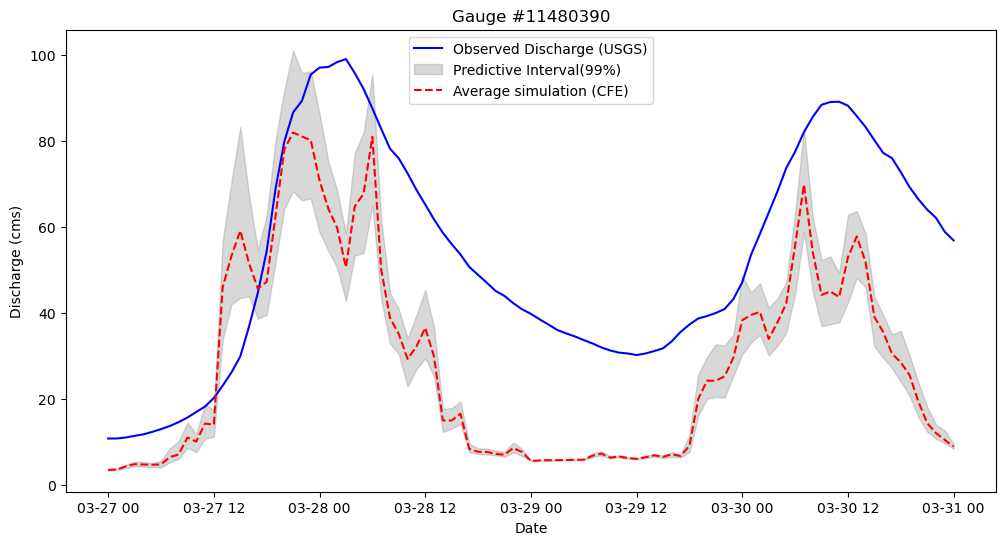

In [8]:
plot_start_date = '2012-03-27'
plot_end_date = '2012-03-31'
plot_mask = (time_index_observed >= plot_start_date) & (time_index_observed <= plot_end_date)
time_index_observed_plot = time_index_observed[plot_mask]
df2_plot = df2[plot_mask]
plot_mask_simulation = (time_index_average_simulation >= plot_start_date) & (time_index_average_simulation <= plot_end_date)
time_index_average_simulation_plot = time_index_average_simulation[plot_mask_simulation]
average_simulation_plot = average_simulation[plot_mask_simulation]
time_index_min_max_simulation_plot = time_index_min_max_simulation[plot_mask_simulation]
min_simulation_plot = min_simulation[plot_mask_simulation]
max_simulation_plot = max_simulation[plot_mask_simulation]
plt.figure(figsize=(12, 6))
plt.plot(time_index_observed_plot, df2_plot, label='Observed Discharge (USGS)', color='blue')
plt.fill_between(time_index_min_max_simulation_plot, min_simulation_plot, max_simulation_plot, color='gray', alpha=0.3, label='Predictive Interval(99%)')
plt.plot(time_index_average_simulation_plot, average_simulation_plot, linestyle='--', color='red', label='Average simulation (CFE) ')

plt.xlabel('Date')
plt.ylabel('Discharge (cms)')
plt.title('Gauge #11480390')
plt.legend()
plt.savefig('filtered_ensemble_peak')
plt.show()
